In [1]:
import time
import tensorflow as tf

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

with tf.Session() as sess:
    result = sess.run(sum_result)
print('result=',result)    

result= -10581.414


In [3]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [4]:
size=500
with tf.device("/cpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [5]:
size=500
with tf.device("/gpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [6]:
def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size],name='W')
        X = tf.random_normal([size, size],name='X')
        mul = tf.matmul(W, X,name='mul')
        sum_result = tf.reduce_sum(mul,name='sum')

    startTime = time.time() 
    tfconfig=tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime   
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes

In [7]:
g=performanceTest("/gpu:0",100)
c=performanceTest("/cpu:0",100)

/gpu:0  size= 100 Time: 0.01454019546508789
/cpu:0  size= 100 Time: 0.014507293701171875


In [8]:
g=performanceTest("/gpu:0",200)
c=performanceTest("/cpu:0",200)

/gpu:0  size= 200 Time: 0.0175478458404541
/cpu:0  size= 200 Time: 0.01905226707458496


In [9]:
g=performanceTest("/gpu:0",1000)
c=performanceTest("/cpu:0",1000)

/gpu:0  size= 1000 Time: 0.021558284759521484
/cpu:0  size= 1000 Time: 0.04588794708251953


In [10]:
g=performanceTest("/gpu:0",5000)
c=performanceTest("/cpu:0",5000)

/gpu:0  size= 5000 Time: 0.05966305732727051
/cpu:0  size= 5000 Time: 1.735241413116455


In [11]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,5001,500):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("--")

/gpu:0  size= 0 Time: 0.02657175064086914
/cpu:0  size= 0 Time: 0.025092363357543945
--
/gpu:0  size= 500 Time: 0.02708721160888672
/cpu:0  size= 500 Time: 0.03360414505004883
--
/gpu:0  size= 1000 Time: 0.02958059310913086
/cpu:0  size= 1000 Time: 0.058168649673461914
--
/gpu:0  size= 1500 Time: 0.035095930099487305
/cpu:0  size= 1500 Time: 0.09978890419006348
--
/gpu:0  size= 2000 Time: 0.03810381889343262
/cpu:0  size= 2000 Time: 0.18049287796020508
--
/gpu:0  size= 2500 Time: 0.04313182830810547
/cpu:0  size= 2500 Time: 0.30132341384887695
--
/gpu:0  size= 3000 Time: 0.05219912528991699
/cpu:0  size= 3000 Time: 0.4647703170776367
--
/gpu:0  size= 3500 Time: 0.06267142295837402
/cpu:0  size= 3500 Time: 0.735508918762207
--
/gpu:0  size= 4000 Time: 0.07323956489562988
/cpu:0  size= 4000 Time: 1.0268516540527344
--
/gpu:0  size= 4500 Time: 0.07871556282043457
/cpu:0  size= 4500 Time: 1.3887948989868164
--
/gpu:0  size= 5000 Time: 0.09878039360046387
/cpu:0  size= 5000 Time: 1.79981017

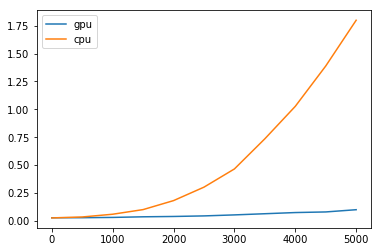

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.legend()

In [13]:
g=performanceTest("/gpu:0",18000)

/gpu:0  size= 18000 Time: 2.145930528640747
